<a href="https://colab.research.google.com/github/gastan81/A-B_testing/blob/main/9_bonus_pandas_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PandasAI

The process of setting up an Assistant and managing Threads to work directly within the OpenAI ecosystem was quite arduous.

PandasAI is a library that allows us to query our dataframes directly, leaving more time and energy to focus on analysis rather than managing the technology.

> **A note before getting started**: Due to the nature of how Large Language Models respond, the outputs of most queries will be different each time they are run. Therefore, the exact results of this notebook are unlikely to be recreated during subsequent executions.     
Also, Pandas AI is also a rather young library, so it may evolve rapidly.

## Installation
To get started, we need to install the latest version of PandasAI.

In [1]:
# in Colab, run this line at the start of every session
# working locally, installation only needs to happen once
# !pip install pandasai

As indicated above, the session requires a restart to proceed. There may also be instabilities due to unresolved dependencies. Such  is the risk working with the latest technologies.

# SmartDataframe

To use PandasAI, we will first have to transform our dataframes into a new type of object: one which allows us to leverage the power of generative AI models to help us in our tasks.

We'll start by importing the libraries that we need.

In [2]:
import pandas as pd
import os
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

## Loading the data

Next we'll choose the dataframe we wish to work with. For starters, let's load *products*.

In [3]:
# products_cl.csv
url = 'https://drive.google.com/file/d/1IPnKYLSnrST0HBZMeSeNrhFfWU31QvwB/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products_cl = pd.read_csv(path)

## Selecting the AI

To use PandasAI, we will need to select a large language model. In this notebook, we'll be using GPT-3.5-Turbo from [OpenAI](https://platform.openai.com/overview). You'll have to choose your own model based on performance and pricing.

More information on callable LLMs can be found [here](https://docs.pandas-ai.com/en/latest/API/llms/).

> **Note:** To use an LLM from OpenAI, **signup** and **payment** are *required*. See the previous notebook.

In [4]:
help(OpenAI)

Help on class OpenAI in module pandasai.llm.openai:

class OpenAI(pandasai.llm.base.BaseOpenAI)
 |  OpenAI(api_token: Optional[str] = None, **kwargs)
 |
 |  OpenAI LLM using BaseOpenAI Class.
 |
 |  An API call to OpenAI API is sent and response is recorded and returned.
 |  The default chat model is **gpt-3.5-turbo**.
 |  The list of supported Chat models includes ["gpt-4", "gpt-4-0613", "gpt-4-32k",
 |   "gpt-4-32k-0613", "gpt-3.5-turbo", "gpt-3.5-turbo-16k", "gpt-3.5-turbo-0613",
 |   "gpt-3.5-turbo-16k-0613", "gpt-3.5-turbo-instruct"].
 |  The list of supported Completion models includes "gpt-3.5-turbo-instruct" and
 |   "text-davinci-003" (soon to be deprecated).
 |
 |  Method resolution order:
 |      OpenAI
 |      pandasai.llm.base.BaseOpenAI
 |      pandasai.llm.base.LLM
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, api_token: Optional[str] = None, **kwargs)
 |      __init__ method of OpenAI Class
 |
 |      Args:
 |          api_token (str): API T

In [5]:
llm = OpenAI(
    api_token=os.getenv('OPENAI_API_KEY'),
    model_name='gpt-3.5-turbo'
)

And now that we have selected our model, we have all the pieces necessary to create a SmartDataframe. With a SmartDataframe, we can still use most of the techniques and methods we already know from Pandas, but we can also ask questions and give instructions.

In [6]:
products_sdf = SmartDataframe(products_cl, config={"llm": llm})

## Querying the dataframe

The `.chat()` method allows us to "speak" to our dataframe, aiding us in performing tasks and gathering analysis.

In [7]:
products_sdf.chat("Taking the first three characters in the column sku as a brand code, identify the 5 most popular brands being carried")

{'type': 'dataframe', 'value':   brand_code  count
0        APP   1721
1        PAC   1396
2        OWC    354
3        AP2    349
4        BEL    219}


,brand_code,count
0,APP,1721
1,PAC,1396
2,OWC,354
3,AP2,349
4,BEL,219


We can write our own code to check the AI's work.
> **Note:** It is *highly* recommended, especially when starting out, to check the AI's work. Different phrasings of the same task can result in either valuable or worthless answers, and only experiment will help to write good prompts.

In [8]:
SmartDataframe(products_cl, config={"llm": llm})

In [9]:
products_sdf.sku.str[:3].value_counts()

AttributeError: 'SmartDataframe' object has no attribute 'sku'

In [10]:
products_sdf.chat("What are the mean and median prices of products?")

{'type': 'number', 'value': {'mean_price': 667.3462680144115, 'median_price': 112.99000000000001}}
Mean Price: 667.3462680144115
Median Price: 112.99000000000001
Mean Price: 667.3462680144115
Median Price: 112.99000000000001
Mean Price: 667.3462680144115
Median Price: 112.99000000000001


Traceback (most recent call last):
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\p

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

## Plotting

We can also use our AI assistant to create plots for us.

In [11]:
import seaborn as sns

# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

orders_sdf = SmartDataframe(orders_qu, config={"llm": llm})

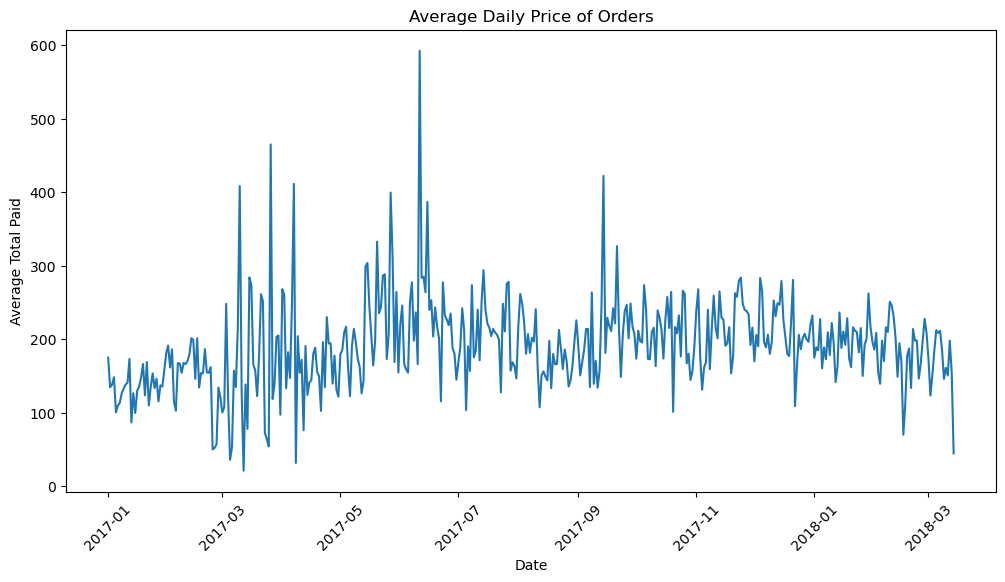

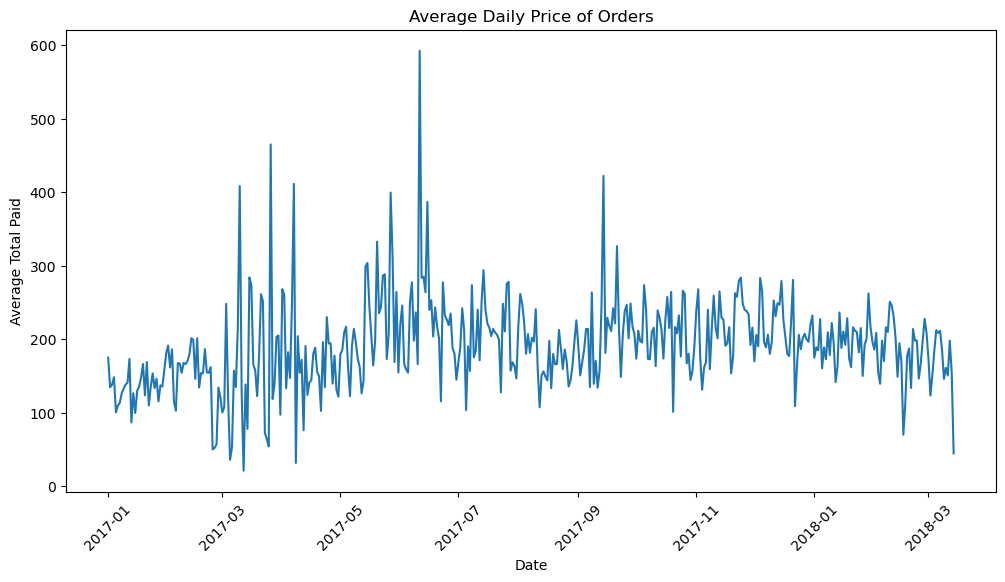

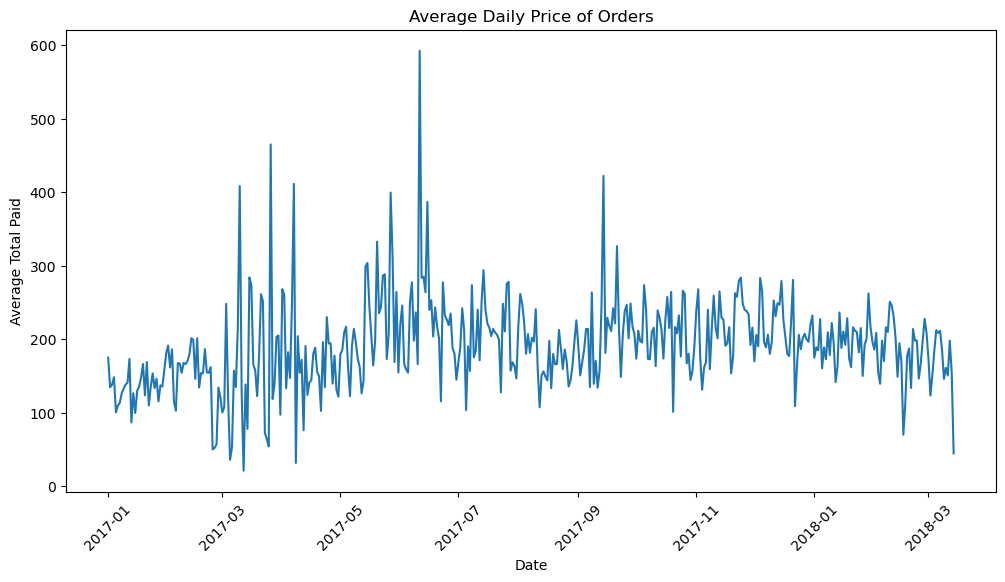

Traceback (most recent call last):
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\code_execution.py", line 113, in execute
    raise e
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\p

"Unfortunately, I was not able to answer your question, because of the following error:\n\n'tight_layout' is not allowed in RestrictedMatplotlib\n"

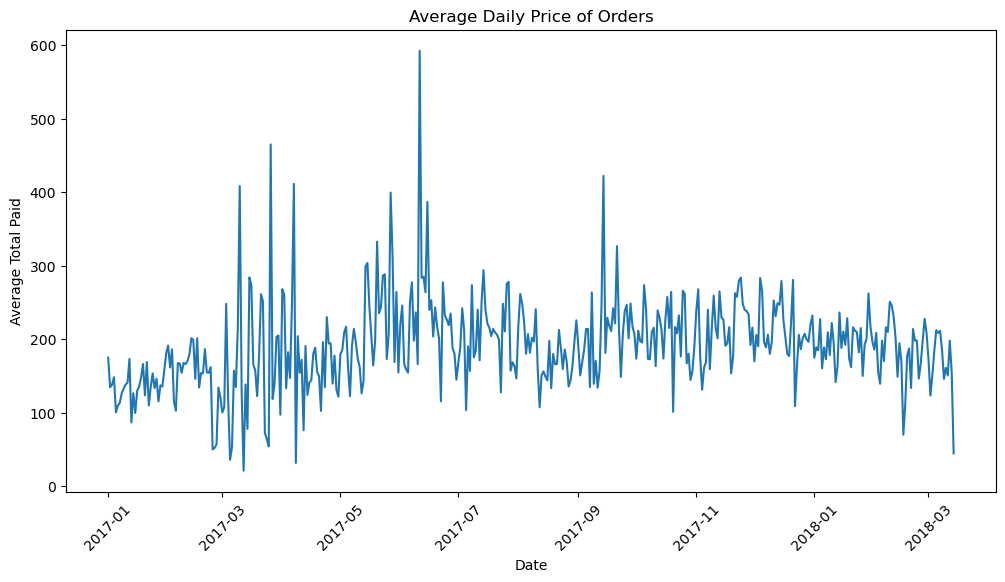

In [12]:
orders_sdf.chat("Using the Seaborn library, display the average daily price of an order on a line plot")

Reviewing the last code executed allows us to see how the chart was generated. We can even see that the chart has been saved as a `.png` file for later use!

In [14]:
print(orders_sdf.last_code_executed)

df = dfs[0]
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date
average_daily_price = df.groupby('date')['total_paid'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_daily_price, x='date', y='total_paid')
plt.title('Average Daily Price of Orders')
plt.xlabel('Date')
plt.ylabel('Average Total Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/Gastan/AppData/Local/Programs/Microsoft VS Code/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': 'C:/Users/Gastan/AppData/Local/Programs/Microsoft VS Code/exports/charts/temp_chart.png'}


# Larger tasks

Let's try asking our SmartDataframe to take on a more detailed and creative task, like category creation.

In [15]:
products_sdf.chat("""Use the name and desc columns to assign categories to the products.
Results should be stored in a new column called category.""")


,sku,name,desc,price,in_stock,type,brand_code,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Laptop
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,Other
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,Other
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,Smartphone
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,Laptop
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,BEL,Accessory
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Laptop
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Laptop
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,THU,Laptop


We can inspect the `.last_code_generated` attribute to see what code has been created.

In [16]:
print(products_sdf.last_code_generated)

data = {'sku': ['QNA0123', 'MOS0084', 'APP2658'], 'name': ['Belkin Leather Tassel Lightning to USB Black', 'Like new - Apple iPhone 7 128GB Silver', 'Be.ez LA robe Case Graphite MacBook Pro 13 "(Late 2016) Gray / Black'], 'desc': ['compact and portable stand vertically or horizontally for Apple Watch', 'Housing with rear aluminum elegant iPhone 6 / 6S.', 'Lightning charger and connection support and magnetic base for Apple Watch and iPhone (MFi)'], 'price': [149.9, 517.04, 179.99], 'in_stock': [1, 0, 1], 'type': ['', '5,45E+15', '21561716']}
df = dfs[0]


def categorize_product(row):
    if 'iPhone' in row['name'] or 'iPhone' in row['desc']:
        return 'Smartphone'
    elif 'MacBook' in row['name'] or 'MacBook' in row['desc']:
        return 'Laptop'
    elif 'charger' in row['desc'] or 'stand' in row['desc']:
        return 'Accessory'
    else:
        return 'Other'


df['category'] = df.apply(categorize_product, axis=1)
result = {'type': 'dataframe', 'value': df}


> **Note:** While SmartDataframes do inherit many methods from Pandas DataFrames, they do not inherit all. There can be problems with column assigment of the sort            
&emsp;&ensp;`sdf['new_column'] = assigned_values`       
Problems have also been experienced with the `.assign()` method. If the produced code does not work well with the `SmartDataframe`, try different methods like `.apply()` or `.pipe()`, or apply the function to the orginal Pandas `DataFrame` as below.

In [17]:
def assign_category(row):
    if 'keyboard' in row['name'].lower() or 'keyboard' in row['desc'].lower():
        return 'Keyboard'
    elif 'mouse' in row['name'].lower() or 'mouse' in row['desc'].lower():
        return 'Mouse'
    elif 'monitor' in row['name'].lower() or 'monitor' in row['desc'].lower():
        return 'Monitor'
    elif 'printer' in row['name'].lower() or 'printer' in row['desc'].lower():
        return 'Printer'
    else:
        return 'Other'

# note we needed to change the line below, as the generated code would have applied to
# a non-existent object dfs
products_cl['category'] = products_cl.apply(assign_category, axis=1)

In [18]:
products_cl

,sku,name,desc,price,in_stock,type,brand_code,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,RAI,Other
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,APP,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,APP,Mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,APP,Other
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,KIN,Other
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,BEL,Other
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Other
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,THU,Other
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,THU,Other


In [19]:
products_cl['category'].value_counts()

Other       9519
Monitor      326
Keyboard      98
Mouse         38
Printer       11
Name: category, dtype: int64

It seems that, contrary to our instuctions, a lot of things have landed in the 'Other' category! We also have *no category* for computers or laptops...

## Refining our code

While generative AI models are quite good at producing simple blocks of code that we might lose a few minutes remembering how to write and debug, they still need supervision with complex tasks.

We now have two options:
1. Manually adjust the `assign_category` function to include more categories and keywords
2. Ask for a new code, this time specifying which categories products should be assigned to

Either option will be an iterative process, requiring us still to review what has been produced and see that it matches our expectations and requirements.

To help guide our decision, we can first review a sample of what products were categorized as "Other".

In [20]:
products_cl.loc[products_cl.category == "Other"].sample(50)

,sku,name,desc,price,in_stock,type,brand_code,category
8028,TUC0336,Tucano Elements Second Skin Case MacBook Air 1...,Neoprene 4mm thick and interior velvet MacBook...,29.90,0,13835403,TUC,Other
5950,PAC1772,QNAP TS-431P NAS,NAS 32TB capacity WD Red hard drives for Mac a...,1935.99,0,12175397,PAC,Other
476,SYN0079,Synology RX1214RP expansion module for Mac and...,Expansion unit 12 bays with redundant power su...,1754.99,0,1280,SYN,Other
9580,PLA0039,Plantronics BackBeat 305 Wireless Headphones F...,Plantronics wireless headset ideal for athlete...,99.99,1,5384,PLA,Other
1487,SYN0105,Synology DX1215 NAS Expansion Unit Mac and PC,Expansion unit 12 Synology NAS server bays.,986.99,0,12175397,SYN,Other
6789,WAC0242,Education - A4 Wacom Bamboo Slate Gray,Bloc notes A4 smart pen includes app button to...,149.99,0,1405,WAC,Other
2735,PAC1584,"Apple iMac 21.5 ""Core i7 3.3GHz 4K Retina | 16...",Desktop computer iMac 21.5-inch 3.3GHz Core i7...,2929.00,0,1282,PAC,Other
6857,APP2037,Like new - Apple iPhone 16 GB Oro Rosa,Apple iPhone SE Free Refurbished 16GB Rose Gol...,489.00,0,51601716,APP,Other
2909,LUN0008,Epik lunatik Correa and housing Green Apple Wa...,Polycarbonate shell and silicone strap Apple W...,59.95,0,2434,LUN,Other
3529,PAC1258,Crucial SSD upgrade kit Kit tools MX200 1TB + ...,Crucial MX200 SSD + 1TB SSD installation kit i...,433.98,0,1433,PAC,Other


We'll try the route of providing categories and allowing the AI to choose how products are selected to fill those categories.

In [21]:
products_sdf.chat("""Given the following categories, write a script to categorize these products using information
in the name and desc columns.
Available categories are: Computers and Laptops, Computer Accessories, Printers and Scanners, Audio Accessories, Cameras,
Phones and Tablets, Storage Solutions, Servers, Cables and Connectors, Phone Accessories, Other
The code should assign each item to a single category and minimize the use of the Other category. Resulting category assignments
should be saved to a new column named category.
""")
# again, we will look at the code our AI generates
print(products_sdf.last_code_generated)

          sku                                           name  \
0     RAI0007              Silver Rain Design mStand Support   
1     APP0023              Apple Mac Keyboard Keypad Spanish   
2     APP0025               Mighty Mouse Apple Mouse for Mac   
3     APP0072  Apple Dock to USB Cable iPhone and iPod white   
4     KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   
...       ...                                            ...   
9987  BEL0376        Belkin Travel Support Apple Watch Black   
9988  THU0060   Enroute Thule 14L Backpack MacBook 13 "Black   
9989  THU0061    Enroute Thule 14L Backpack MacBook 13 "Blue   
9990  THU0062     Enroute Thule 14L Backpack MacBook 13 "Red   
9991  THU0063   Enroute Thule 14L Backpack MacBook 13 "Green   

                                                   desc  price  in_stock  \
0          Aluminum support compatible with all MacBook  59.99         1   
1             USB ultrathin keyboard Apple Mac Spanish.  59.00         0   
2  

It seems we will once more need to make some changes, like moving the `categories` dictionary inside the function to limit its scope and applying the function to a single dataframe, rather than a list of them.

In [22]:
def categorize_product(row):
    name = row['name'].lower()
    desc = row['desc'].lower()
    categories = {'Computers and Laptops': ['computer', 'laptop'],
                  'Computer Accessories': ['keyboard', 'mouse'],
                  'Printers and Scanners': ['printer', 'scanner'],
                  'Audio Accessories': ['headphones', 'speakers'],
                  'Cameras': ['camera'],
                  'Phones and Tablets': ['phone', 'tablet'],
                  'Storage Solutions': ['hard drive', 'usb'],
                  'Servers': ['server'],
                  'Cables and Connectors': ['cable', 'connector'],
                  'Phone Accessories': ['phone accessory']
                  }

    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in name or keyword in desc:
                return category
    return 'Other'

products_cl['category'] = products_cl.apply(categorize_product, axis=1)

Again, we will review the "Other" category to see if we spot any pattern in the items being assigned there.

In [23]:
products_cl.loc[products_cl.category == "Other"].sample(50)

,sku,name,desc,price,in_stock,type,brand_code,category
7214,AKI0022,Box Thunder2 Akitio PCIe Thunderbolt 2,Thunderbolt chassis 2 PCI Express expansion cards,319.00,0,12995397,AKI,Other
7364,APP2285,"Apple MacBook Pro 13 ""Core i5 Touch Bar 33GHz ...",New MacBook Pro 13-inch Core i5 Touch Bar 33 G...,3109.00,0,"1,02E+12",APP,Other
1434,SPE0152,Speck SeeThru Satin MacBook Pro Retina housing...,Housing for MacBook Pro with Retina 13-inch (J...,49.90,1,13835403,SPE,Other
3608,PAC1262,Crucial SSD upgrade kit MX200 1TB iMac + Toolkit,Crucial MX200 SSD + 1TB SSD installation kit i...,433.98,0,1433,PAC,Other
690,PAC0391,OWC Data Doubler Pack MacBook / Macbook Pro Black,Pack Replacement Superdrive for SSD / HDD + bo...,121.98,1,12755395,PAC,Other
1704,APP1955,"Apple MacBook Pro Retina 13 ""Core i5 29Ghz | 8...",MacBook Pro 13-inch Retina display 29 Ghz i5 |...,2539.00,0,1282,APP,Other
9605,APP2366,"Apple Macbook Pro 13 ""Core i7 25GHz | 16GB | 1...",New MacBook Pro 13-inch Core i7 25 GHz with 16...,3099.00,0,"1,02E+12",APP,Other
7373,APP2293,"Apple MacBook Pro 13 ""Core i7 Touch Bar 35GHz ...",New MacBook Pro 13 inch Touch Bar 35 GHz Core ...,2599.00,0,"1,02E+12",APP,Other
2912,LUN0010,Epik lunatik Correa and housing 42mm Apple Wat...,Polycarbonate shell and silicone strap Apple W...,59.95,0,2434,LUN,Other
3742,TUC0255,Tucano Nido Hard-Shell Case MacBook Pro Retina...,rigid and slicked with rubber feet for MacBook...,29.90,1,13835403,TUC,Other


At this point it may be best to add new keywords to the `categories` dictionary above until our job is done.

## SmartDatalake

Of course, in this project and many others, we are often interested in the interations of many related collections of data. So far, we have used `.merge()` to bring together dataframes as we need them.

With PandasAI, we can instead create a SmartDatalake from multiple dataframes, and then allow the underlying LLM to infer connections.

In [24]:
from pandasai import SmartDatalake

We can start by joining loading the rest of our Eniac data and joining everything into one SmartDatalake.

In [25]:
# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [27]:
eniac = SmartDatalake(
    [orders_qu,
     orderlines_qu.drop("product_id", axis=1),  # a little experimenting has shown this column causing problems, so we drop it immediately
     products_cl,
     brands],
    config={"llm": llm}
)

In [28]:
eniac.chat("Name the three products which were ordered the most often.")

{'type': 'dataframe', 'value':                                                 name  product_quantity
0                   IPhone AppleCare Protection Plan               955
1  Apple Lightning Cable Connector to USB 1m Whit...               820
2  AirPods Apple Bluetooth Headset for iPhone iPa...               537}


,name,product_quantity
0,IPhone AppleCare Protection Plan,955
1,Apple Lightning Cable Connector to USB 1m Whit...,820
2,AirPods Apple Bluetooth Headset for iPhone iPa...,537


In [29]:
print(eniac.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Assuming dfs is already defined as a list of DataFrames
# Extract the relevant DataFrames
orders_df = dfs[1]  # This dataframe contains product orders

# Group by 'sku' and sum the 'product_quantity' to find total orders for each product
product_orders = orders_df.groupby('sku')['product_quantity'].sum().reset_index()

# Sort the products by total quantity ordered in descending order
top_products = product_orders.sort_values(by='product_quantity', ascending=False).head(3)

# Merge with the product details to get product names
products_details_df = dfs[2]  # This dataframe contains product details
top_products_with_names = top_products.merge(products_details_df[['sku', 'name']], on='sku', how='left')

# Prepare the result variable
result = {
    "type": "dataframe",
    "value": top_products_with_names[['name', 'product_quantity']]
}

# Display the result
print(result)


<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\safe_libs\base_restricted_module.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  return func(*args, **kwargs)
Traceback (most recent call last):
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\chat\generate_chat_pipeline.py", line 335, in run
    ).run(input)
      ^^^^^^^^^^
  File "C:\Users\Gastan\AppData\Roaming\Python\Python312\site-packages\pandasai\pipelines\pipeline.py", line 137, in run
    raise e
  File "C:\Users\Gastan\AppData\

'Unfortunately, I was not able to answer your question, because of the following error:\n\nThe truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().\n'

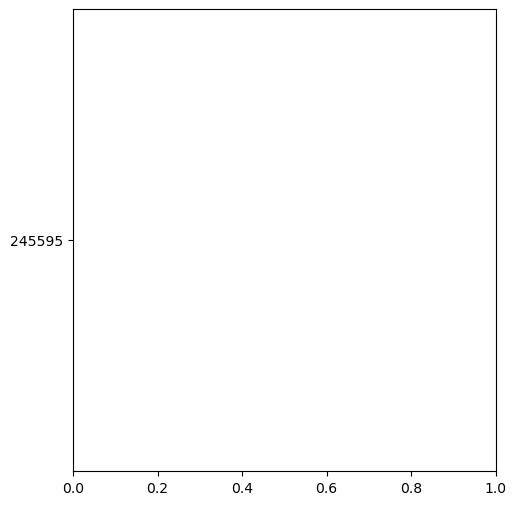

In [30]:
eniac.chat("""Using Seaborn, make two horizontal bar plots for the top 10 products sold in January 2017
& the top 10 products sold in January 2018.
Each chart should be ordered by the number of products sold, and each should contain only 10 items.
Products that appear in both charts should be colored blue.
All other products should be colored gray.""")

This has of course required a few different attempts to pose the query *correct enough* to get a result approaching what is needed.

Still, it looks like this will take some editing...

In [31]:
print(eniac.last_code_executed)

orders_2017 = dfs[0]
orders_2018 = dfs[1]
orders_2017['created_date'] = pd.to_datetime(orders_2017['created_date'])
orders_2018['date'] = pd.to_datetime(orders_2018['date'])
jan_2017 = orders_2017[orders_2017['created_date'].dt.month == 1]
jan_2018 = orders_2018[orders_2018['date'].dt.month == 1]
top_products_2017 = jan_2017.groupby('sku')['total_paid'].count().nlargest(10).reset_index()
top_products_2018 = jan_2018.groupby('sku')['product_quantity'].sum().nlargest(10).reset_index()
common_products = set(top_products_2017['sku']).intersection(set(top_products_2018['sku']))
top_products_2017['color'] = top_products_2017['sku'].apply(lambda x: 'blue' if x in common_products else 'gray')
top_products_2018['color'] = top_products_2018['sku'].apply(lambda x: 'blue' if x in common_products else 'gray')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_products_2017, y='sku', x='total_paid', palette=top_products_2017['color'])
plt.title('Top 10 Products Sold in January 201

C:\Users\Gastan\AppData\Local\Temp\ipykernel_27072\1727610865.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2017_products, palette=colors1, ax=ax1)
C:\Users\Gastan\AppData\Local\Temp\ipykernel_27072\1727610865.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2018_products, palette=colors2, ax=ax2)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\content\\exports\\charts\\temp_chart.png'

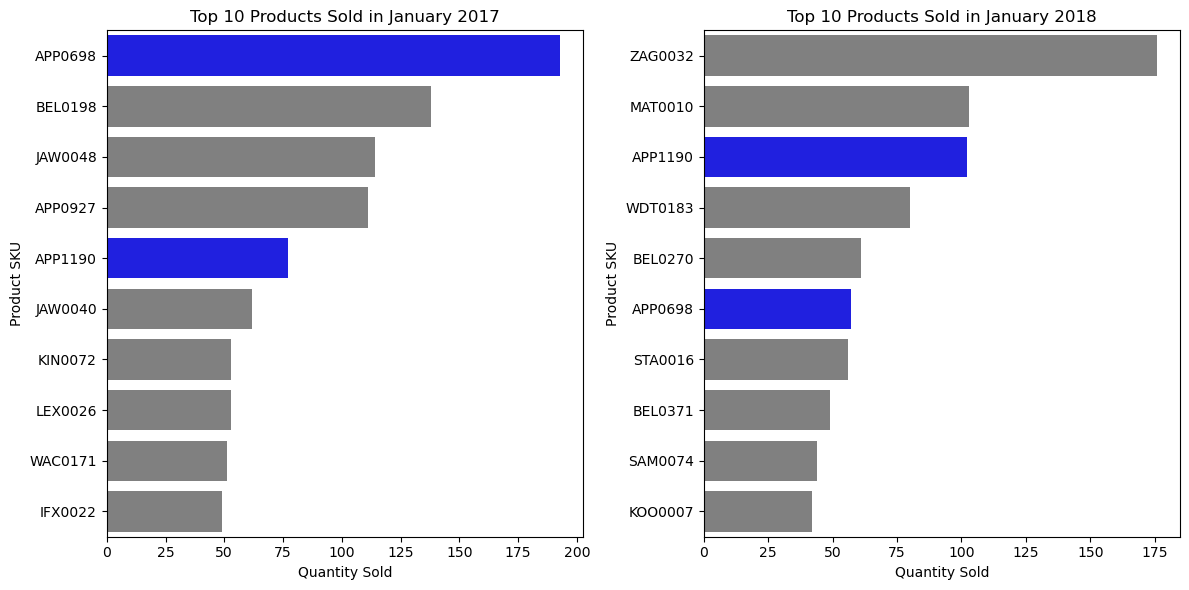

In [32]:
orders_df = orders_qu.copy()
order_items_df = orderlines_qu.copy()
import matplotlib.pyplot as plt
jan_2017_orders = orders_df[(orders_df['created_date'] >= '2017-01-01') & (orders_df['created_date'] <= '2017-01-31')]
jan_2018_orders = orders_df[(orders_df['created_date'] >= '2018-01-01') & (orders_df['created_date'] <= '2018-01-31')]
jan_2017_order_items = jan_2017_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2018_order_items = jan_2018_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2017_product_sales = jan_2017_order_items.groupby('sku')['product_quantity'].sum().reset_index()
jan_2018_product_sales = jan_2018_order_items.groupby('sku')['product_quantity'].sum().reset_index()
top_10_jan_2017_products = jan_2017_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
top_10_jan_2018_products = jan_2018_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
# the problem lies in setting one list of colors for both charts
colors1 = [('blue' if sku in top_10_jan_2018_products['sku'].values else 'gray') for sku in top_10_jan_2017_products['sku'].values]
colors2 = [('blue' if sku in top_10_jan_2017_products['sku'].values else 'gray') for sku in top_10_jan_2018_products['sku'].values]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# palette now needs to be adjusted for each chart
sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2017_products, palette=colors1, ax=ax1)
ax1.set_title('Top 10 Products Sold in January 2017')
ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('Product SKU')
sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2018_products, palette=colors2, ax=ax2)
ax2.set_title('Top 10 Products Sold in January 2018')
ax2.set_xlabel('Quantity Sold')
ax2.set_ylabel('Product SKU')
plt.tight_layout()
plt.savefig('/content/exports/charts/temp_chart.png')

# Challenges

The challenge here will be rather open-ended. Remember, there are many different LLMs to work with, and each one can produce different results -- even when faced with the same query.

The task, then, is to experiment with which LLM and which tasks your own workflow can be improved. It may be in finding inspiration on which aspects of your data to investigate. It may be letting the AI create graphs for you based on your needs, or manage the merging of your dataframes.

Just as each inter-collegue relationship is different, each data scientist will find their own way to best work with AI tools.

Good luck! 😀